# TP 1 : K-Nearest-Neighbours

In [30]:
#imports
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from time import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load dataset
mnist = fetch_openml('mnist_784')

## Partie 1 : Exploration du jeu de données
### 1.1 Inspection de la structure du jeu de données

On analyse la nature et les dimensions des données à notre disposition. Le rôle et la valeur attendue est indiquée en commentaire pour chaque propriété

In [3]:
#1.1
print(mnist) #représentation des paramètres du jeu de données, les images, leurs labels,
#et des informations supplémentaires de numpy (9 champs en tout)

print (mnist.data) #les images(chiffres) du dataset
print (mnist.target) #les labels(chiffre représenté par l'image) du dataset, 1 pour chaque image
print (len(mnist.data)) #le nombre d'images du dataset
print (mnist.data.shape) #la dimension des images du dataset (70000 * 784)
print (mnist.target.shape) #la dimension des labels du dataset (70000 * 1)
print (mnist.data[0]) #la première image du dataset
print (mnist.data[0][1]) #le deuxième pixel de la première image du dataset
print (mnist.data[:,1]) #le deuxième pixel de chaque image du dataset
print (mnist.data[:100]) #les 100 premières images du dataset

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

### 1.2 Affichage d'une image et du label associé
Plot d'une image : Puisque les images du dataset sont 'écrasées' en une dimension de 784 pixel, on les redimensionne d'abord au format ligne/colonne 28 * 28

Associated label : 5


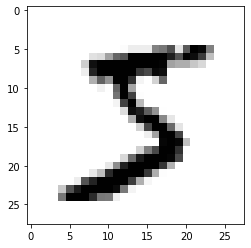

In [4]:
img_index = 0
images = mnist.data.reshape((-1, 28, 28))
plt.imshow(images[img_index],cmap=plt.cm.gray_r,interpolation="nearest")
print("Associated label :",mnist.target[img_index])

### 1.3 Extraction de données aléatoires
Enfin, on utilise les fonctions numpy pour extraire un échantillon aléatoire depuis le jeu de donénes initial, qui servira pour la suite du TP

In [5]:
#choose sample size
dataset_length = len(mnist.data)
sample_size = 5000
sample_size = min(dataset_length,sample_size)

#extract sample from dataset
sample_indexes = np.random.randint(dataset_length, size= sample_size)
data, target = np.array([mnist.data[i] for i in sample_indexes]), np.array([mnist.target[i] for i in sample_indexes])

## Partie 2 : Méthode KNN
### 2.1 Premières classifications

#### Diviser la base de données à 80% pour l’apprentissage (training) et à 20% pour les tests

In [6]:
train_size = 0.8
d_train, d_test, l_train, l_test = train_test_split(data,target,train_size = train_size)

#### Entrainer un classifieur k-nn avec k = 10 sur le jeu de données chargé.

In [7]:
clf = KNeighborsClassifier(10)
clf.fit(d_train,l_train)

KNeighborsClassifier(n_neighbors=10)

#### Afficher la classe de l’image 4 et sa classe prédite

In [13]:
pred_index = 3
prediction = clf.predict(([data[pred_index]]))[0] #predict method awaits a list of data
expected = target[pred_index]
print("prediction : " + str(prediction))
print("expected : " + str(expected))

prediction : 7
expected : 7


#### Afficher le score sur l’échantillon de test

In [15]:
score = clf.score(d_test, l_test)
print("score = " + str(score))

score = 0.904


#### Quel est le taux d'erreur sur vos données d'apprentissage ? Est-ce normal ?

In [16]:
score = clf.score(d_train, l_train)
print("score = " + str(score))

score = 0.94525


On obtient un taux d'erreur non-nul (score < 100%)
C'était à attendre, puisque le modèle ne n'ajuste pas pour vérifier chaque échantillon du jeu de test, seulement un maximum d'entre eux

#### Faire varier le nombre de voisins (k) de 2 jusqu’à 15 et afficher le score. 
#### Quel est le k optimal ?

Optimal k : 3 ( score : 0.953 )
Executed in 311.1638696193695 s


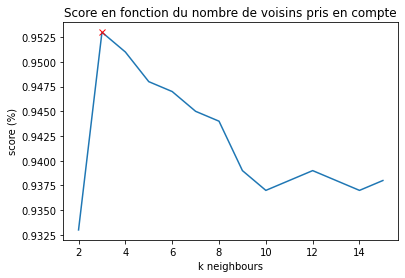

In [17]:
best_score = 0
best_nb = 0 #k optimal
train_size = 0.8
d_train, d_test, l_train, l_test = train_test_split(data,target,train_size = train_size)
n_nb_set = range(2,16)
plot=([],[])

start = time() #TIMER START

for n_nb in n_nb_set:
    #print("Computing for",n_nb,train_size)
    clf = KNeighborsClassifier(n_nb)
    clf.fit(d_train	,l_train)
    score = clf.score(d_test, l_test)
    #print("Score :",score)
    if score>best_score:
        best_nb = n_nb
        best_score = score
    plot[0].append(n_nb)
    plot[1].append(score)
    
duration = time() - start #TIMER END

fig,ax = plt.subplots()
ax.set_xlabel("k neighbours")
ax.set_ylabel("score (%)")
ax.set_title("Score en fonction du nombre de voisins pris en compte")
ax.plot(plot[0],plot[1])
ax.plot([best_nb],[best_score], marker= 'x', color='r')

print("Optimal k :", best_nb, "( score :",best_score,')')
print("Executed in",duration,'s')

Le nombre de voisins(k) optimal semble être 5. Ce sera donc la valeur retenue pour les prochains tests où l'on devra fixer ce paramètre.

On notera cependant que les scores obtenus sont très proches, et semblent plus stable autour de 9 voisins.
On observe une dégradation globale pour des valeurs supérieures à 9 voisins.

Optimal k : 8 ( score : 0.9438202247191011 )
Executed in 26.24063539505005 s


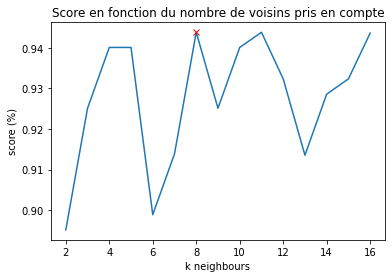

In [27]:
best_score_fold = 0
best_nb_fold = 0 #k optimal
train_size = 0.8
d_train, d_test, l_train, l_test = train_test_split(data,target,train_size = train_size)
plot_fold=([],[])
kf = KFold(n_splits=15, shuffle=True)

start = time() #TIMER START

n_nb =2
for train_index, test_index in kf.split(d_train, l_train):
    clf = KNeighborsClassifier(n_nb)
    clf.fit(d_train[train_index], l_train[train_index])
    score = clf.score(d_train[test_index], l_train[test_index])
    if score>best_score_fold:
        best_nb_fold = n_nb
        best_score_fold = score
    plot_fold[0].append(n_nb)
    plot_fold[1].append(score)
    n_nb += 1
    
duration = time() - start #TIMER END

fig,ax = plt.subplots()
ax.set_xlabel("k neighbours")
ax.set_ylabel("score (%)")
ax.set_title("Score en fonction du nombre de voisins pris en compte")
ax.plot(plot_fold[0],plot_fold[1])
ax.plot([best_nb_fold],[best_score_fold], marker= 'x', color='r')

print("Optimal k :", best_nb_fold, "( score :",best_score_fold,')')
print("Executed in",duration,'s')

Optimal k : 3 ( score : 0.9376 )
Executed in 585.2448868751526 s


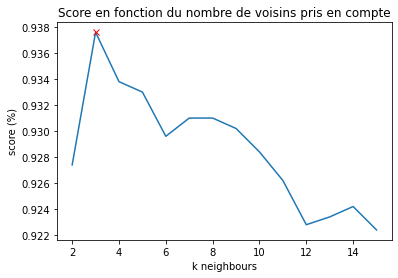

In [32]:
best_score_fold = 0
best_nb_fold = 0 #k optimal
train_size = 0.8
n_nb_set = range(2,16)
d_train, d_test, l_train, l_test = train_test_split(data,target,train_size = train_size)
plot_fold=([],[])
kf = KFold(n_splits=15, shuffle=True)

start = time() #TIMER START

for n_nb in n_nb_set:
    #print("Computing for",n_nb,train_size)
    clf = KNeighborsClassifier(n_nb)
    scores = cross_val_score(clf, data, target, cv=5, scoring='accuracy' )
    score = scores.mean()
    #print("Score :",score)
    if score>best_score_fold:
        best_nb_fold = n_nb
        best_score_fold = score
    plot_fold[0].append(n_nb)
    plot_fold[1].append(score)
    
duration = time() - start #TIMER END

fig,ax = plt.subplots()
ax.set_xlabel("k neighbours")
ax.set_ylabel("score (%)")
ax.set_title("Score en fonction du nombre de voisins pris en compte")
ax.plot(plot_fold[0],plot_fold[1])
ax.plot([best_nb_fold],[best_score_fold], marker= 'x', color='r')

print("Optimal k :", best_nb_fold, "( score :",best_score_fold,')')
print("Executed in",duration,'s')

#### Faites varier le pourcentage des échantillons (training et test) et affichez le score. 
#### Quel est le pourcentage remarquable ?

Optimal training proportion : 0.7000000000000001 ( score : 0.9333333333333333 )
Executed in 103.57540011405945 s


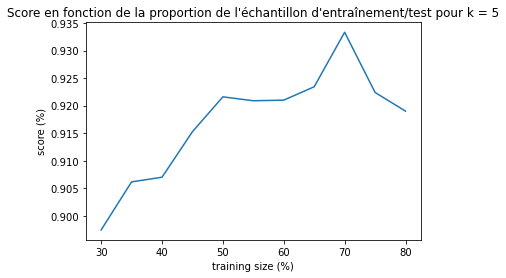

In [18]:
best_score = 0 
best_size = 0 #training sample size
train_size_set = [i*0.05 for i in range(6,17)] #variation between 30-80 by 5% steps
n_nb = 5 #from previous estimations
plot=([],[])

start = time() #TIMER START
clf = KNeighborsClassifier(n_nb)
for train_size in train_size_set:
    d_train, d_test, l_train, l_test = train_test_split(data,target,train_size = train_size)
    clf.fit(d_train	,l_train)
    score = clf.score(d_test, l_test)
    if score>best_score:
        best_score = score
        best_size = train_size
    plot[0].append(100*train_size)
    plot[1].append(score)
    
duration = time() - start #TIMER END

fig,ax = plt.subplots()
ax.set_xlabel("training size (%)")
ax.set_ylabel("score (%)")
ax.set_title("Score en fonction de la proportion de l'échantillon d'entraînement/test pour k = 5")
ax.plot(plot[0],plot[1])

print("Optimal training proportion :",best_size, "( score :",best_score,')')
print("Executed in",duration,'s')

On observe une croissance nette du score jusqu'à 65% du dataset utilisé pour l'entraînement, puis une chute jusqu'à 70%
Le score croit ensuite de nouveau passé 70%, mais le pourcentage de données alors utilisées pour le test perd en signification : si l'on prenait 99% de données d'entraînement, le score serait probablement idéal mais le modèle serait moins pertinent une fois appliqué sur d'autres données.
Un bon compromis efficacité/pertinence semble donc être 65% d'entraînement.

#### Faites varier les types de distances (p). 
#### Quelle est la meilleure distance ?

Execution for metric 1 : 9.136686086654663 s
Execution for metric 2 : 8.969017744064331 s
Execution for metric 3 : 147.36962223052979 s
Optimal distance : 3 ( score : 0.924 )
Executed in 165.47620844841003 s


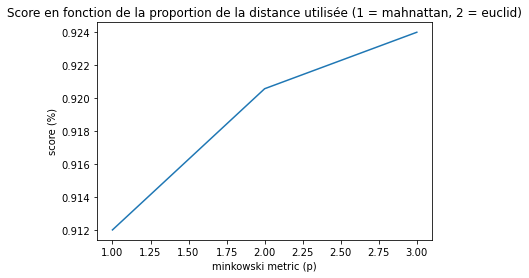

In [19]:
best_dist = 0
best_score = 0
dist_set = [1,2,3]
train_size = 0.65 #from previous tests
n_nb = 5 #from previous tests
d_train, d_test, l_train, l_test = train_test_split(data,target,train_size = train_size)
plot=([],[])

start = time() #TIMER START

for dist in dist_set:
    start_iter = time()
    clf = KNeighborsClassifier(n_nb, p = dist)
    clf.fit(d_train	,l_train)
    score = clf.score(d_test, l_test)
    duration_iter = time()-start_iter
    print("Execution for metric",dist,":",duration_iter,"s")
    if score>best_score:
        best_score = score
        best_dist = dist
    plot[0].append(dist)
    plot[1].append(score)
    
duration = time() - start #TIMER END

fig,ax = plt.subplots()
ax.set_xlabel("minkowski metric (p)")
ax.set_ylabel("score (%)")
ax.set_title("Score en fonction de la proportion de la distance utilisée (1 = mahnattan, 2 = euclid)")
ax.plot(plot[0],plot[1])
print("Optimal distance :",best_dist, "( score :",best_score,')')
print("Executed in",duration,'s')

La métrique de distance optimale semble donc être obtenue pour la distance de minkowski 4, et la tendance semble croissante avec la métrique utilisée.
En revanche, les temps d'exécution explose (x10) lorsque l'on sort des deux métriques classiques manhattan et euclidienne (1 et 2 respectivement). La métrique pertinente semble donc être la distance euclidienne, compromis en efficacité et rapidité.

#### Fixez n_job à 1 puis à -1 et calculez le temps de chacun.

In [20]:
train_size = 0.65 #from previous tests
n_nb = 5 #from previous tests
dist = 2
d_train, d_test, l_train, l_test = train_test_split(data,target,train_size = train_size)


clfA = KNeighborsClassifier(n_nb, p = dist, n_jobs = 1)
clfB = KNeighborsClassifier(n_nb, p = dist, n_jobs = -1)

start = time()
clfA.fit(d_train, l_train)
score = clf.score(d_test, l_test)
duration = time() - start
print("Execution for n_jobs = 1:",duration,"s")

start = time()
clfB.fit(d_train, l_train)
score = clf.score(d_test, l_test)
duration = time() - start
print("Execution for n_jobs = -1:",duration,"s")

Execution for n_jobs = 1: 159.75563859939575 s
Execution for n_jobs = -1: 156.8400616645813 s


#### A votre avis, quels sont les avantages et les inconvénients des k-nn : 
#### optimalité ? temps de calcul ? passage à l'échelle ?

Les k-nn sont efficaces  /!\ A compléter /!\

En revanche, il est nécessaire de définir un jeu d'entraînement suffisamment petit et néanmoins représentatif. En effet, plus le jeu d'entraînement sera grand, plus le nombre de mesure de distance à effectuer pour une prédiction sera élevé.

De plus, la définition de la métrique de distance est cruciale et doit également être un compromis pertinence/temps de calcul car elle seraexécutée de nombreuse fois et représente la quasi totalité de la complexité de l'algorithme.

# FIN TP 1